In [2]:
import os

basedir = "./testsystems"
    
results_fit = {}
results_afit = {}
    
for system in os.listdir(basedir):
    fitteddens = []
    afitteddens = []
    for input in os.listdir(basedir+"/"+system):
        if input == "results.debug.parallel":
            fp = open(basedir+"/"+system+"/"+input, "r")
            
            for line in fp:
                if line.find("total fitted density") > 0:
                    fitteddens.append(float(line.split()[-1]))
                elif line.find("total analytical fitted density") > 0:
                    afitteddens.append(float(line.split()[-1]))

            fp.close()

    results_fit[system] = fitteddens
    results_afit[system] = afitteddens

H2O 5.257141630465867e-06


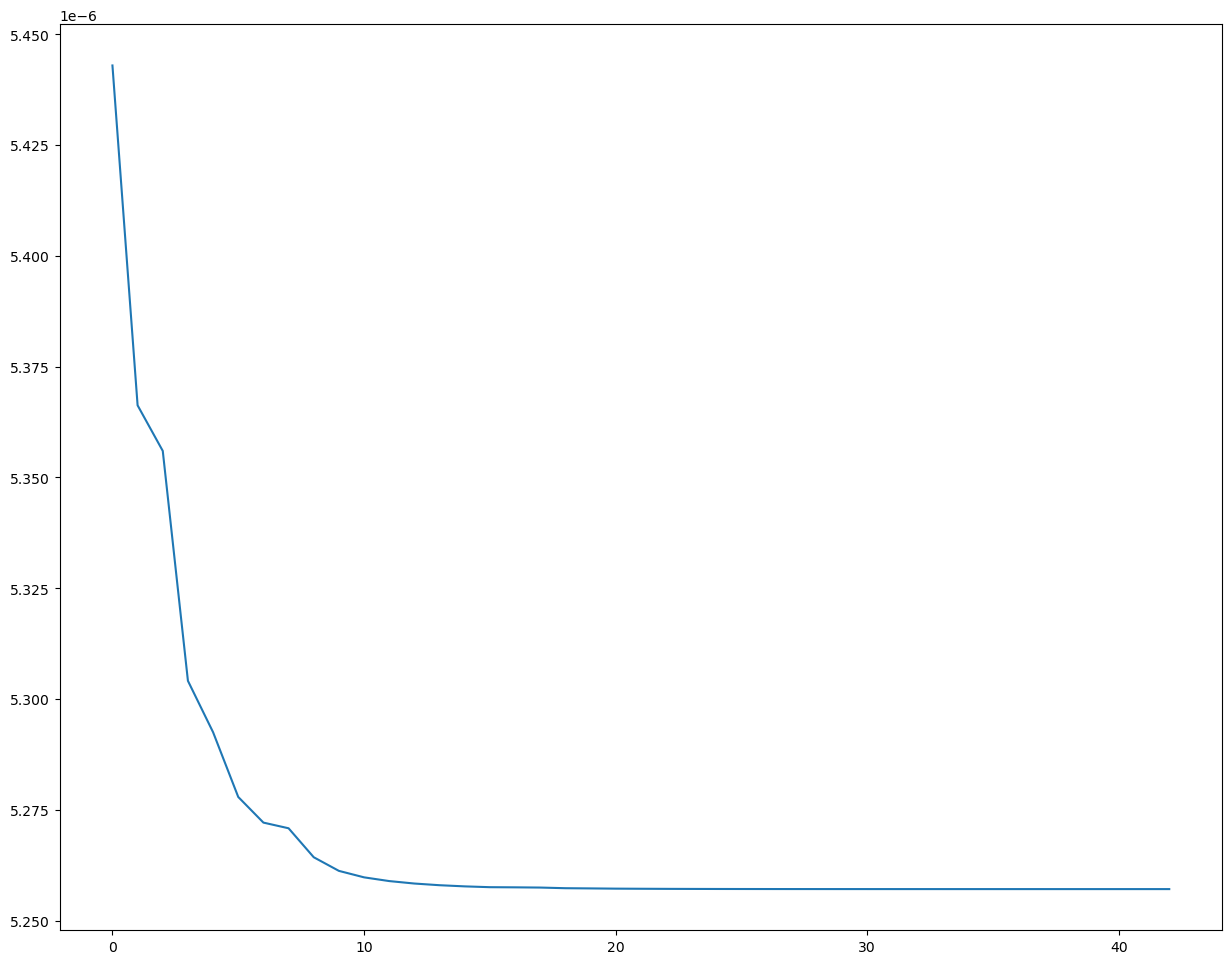

Au2 0.003746336003985107


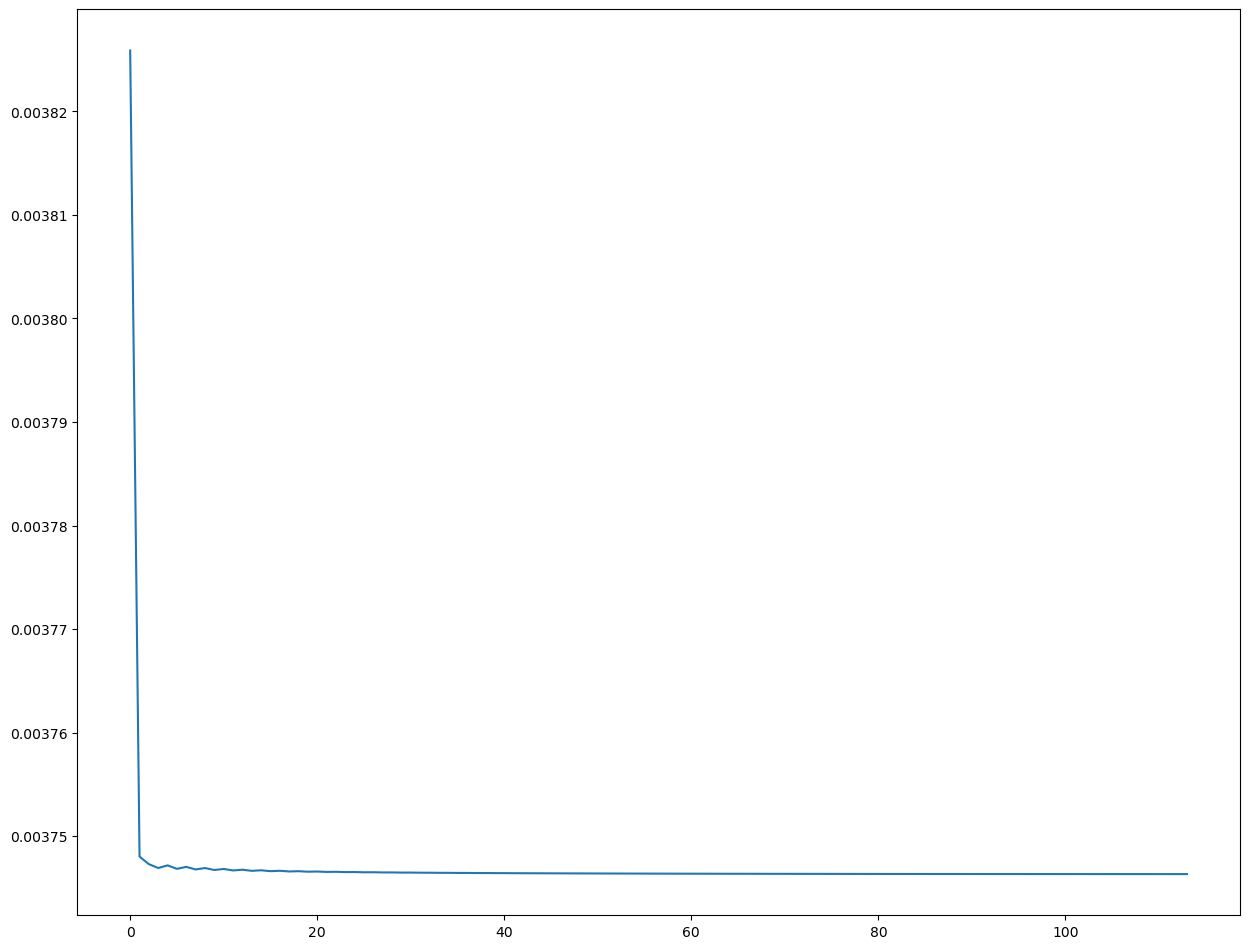

PbCl2 0.0015994085000130553


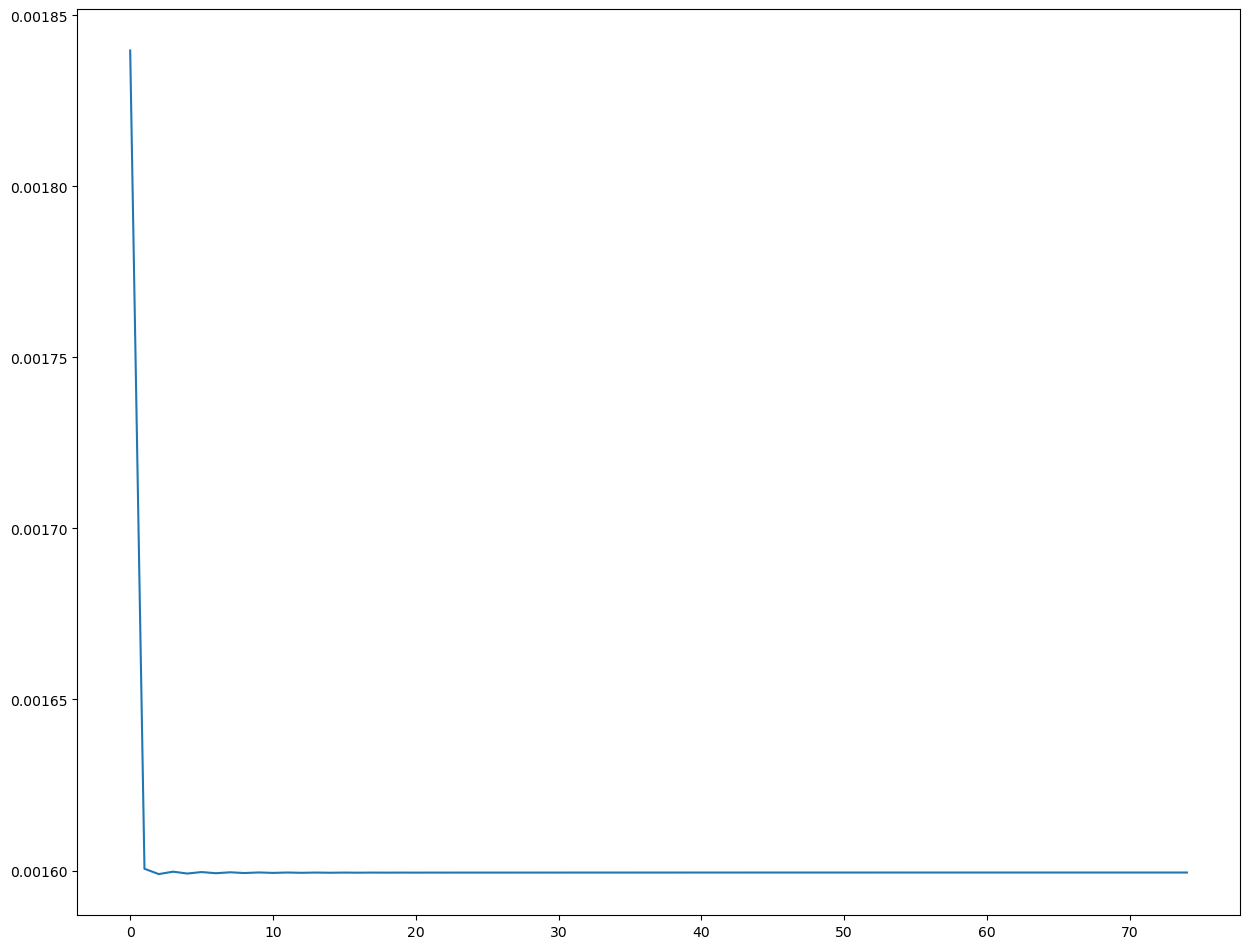

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


for system in results_fit:
    x = []
    y = []
    for idx, fitv in enumerate(results_fit[system]):
        afitv = results_afit[system][idx]

        x.append(idx)
        y.append(abs(fitv-afitv))
        #print(fitv , afitv, abs(fitv-afitv))
    print(system , y[-1])
    figure(figsize=(15, 12), dpi=100)
    plt.plot (x, y)
    plt.show()

